In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
print("Success")

Success


In [2]:
train_data = pd.read_csv("data/train.csv")

In [3]:
train_data.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
train_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [6]:
train_data.shape

(8693, 14)

C:\Users\User\AppData\Local\Temp\ipykernel_8728\1460146067.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr())


<Axes: >

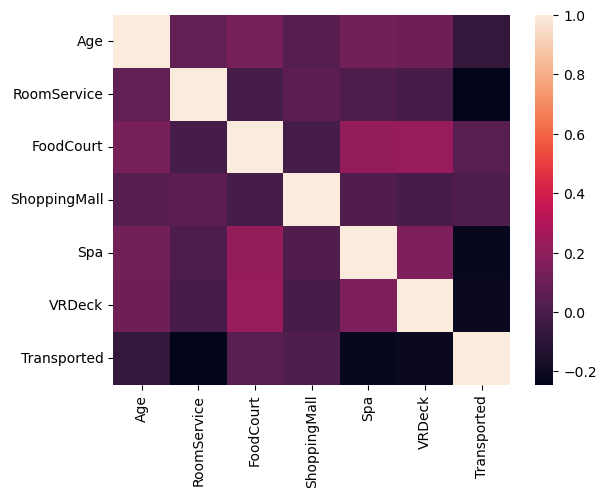

In [7]:
sns.heatmap(train_data.corr())

In [8]:
train_data["Destination"].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

In [9]:
train_data["Transported"] = train_data["Transported"].replace({True: 1, False: 0})

train_data["VIP"] = train_data["VIP"].replace({True: 1, False: 0})
train_data["VIP"] = train_data["VIP"].fillna(0)
train_data['VIP'] = train_data['VIP'].astype(np.int64)

train_data["HomePlanet"] = train_data["HomePlanet"].fillna("Earth")
train_data["HomePlanet"] = train_data["HomePlanet"].replace({"Europa": 0, "Earth" : 1, "Mars" : 2})

train_data["CryoSleep"] = train_data["CryoSleep"].replace({True: 1, False: 0})
train_data["CryoSleep"] = train_data["CryoSleep"].fillna(0)
train_data['CryoSleep'] = train_data['CryoSleep'].astype(np.int64)

train_data["Destination"] = train_data["Destination"].fillna("TRAPPIST-1e")
train_data["Destination"] = train_data["Destination"].replace({"TRAPPIST-1e": 0, "PSO J318.5-22" : 1, "55 Cancri e" : 2})

"""
earth = 4602
Europa = 2131
Mars = 1759
"""
train_data["RoomService"] = train_data["RoomService"].fillna(0)
train_data["FoodCourt"] = train_data["FoodCourt"].fillna(0)
train_data["ShoppingMall"] = train_data["ShoppingMall"].fillna(0)
train_data["Spa"] = train_data["Spa"].fillna(0)
train_data["VRDeck"] = train_data["VRDeck"].fillna(0)

train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,0,0,B/0/P,0,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,1,0,F/0/S,0,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,0,0,A/0/S,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,0,0,A/0/S,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,1,0,F/1/S,0,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1


In [10]:
train_data.groupby("CryoSleep").count()

,PassengerId,HomePlanet,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
CryoSleep,,,,,,,,,,,,,
0,5656,5656,5541,5656,5559,5656,5656,5656,5656,5656,5656,5518,5656
1,3037,3037,2953,3037,2955,3037,3037,3037,3037,3037,3037,2975,3037


In [11]:
train_data["MoneySpent"] = train_data["RoomService"] + train_data["FoodCourt"] + train_data["ShoppingMall"] + train_data["Spa"] + train_data["VRDeck"]
train_data.head()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,MoneySpent
0,0001_01,0,0,B/0/P,0,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,0.0
1,0002_01,1,0,F/0/S,0,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,736.0
2,0003_01,0,0,A/0/S,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,10383.0
3,0003_02,0,0,A/0/S,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,5176.0
4,0004_01,1,0,F/1/S,0,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,1091.0


In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2)

listik = ["Transported","HomePlanet","Destination", "CryoSleep"]

for train_indices, test_indices in split.split(train_data, train_data[listik].iloc[:,1]):
    strat_train_set = train_data.loc[train_indices]
    strat_test_set = train_data.loc[test_indices]

<Axes: >

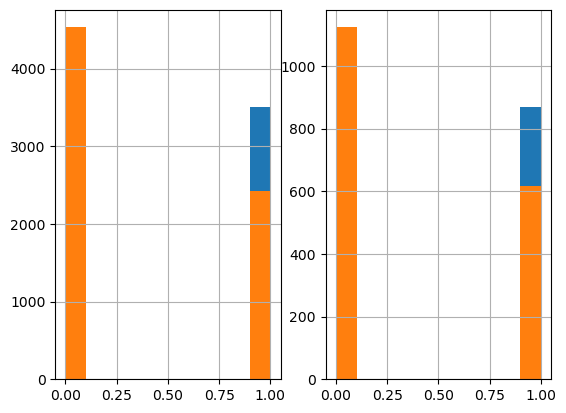

In [13]:
plt.subplot(1,2,1)
strat_train_set["Transported"].hist()
strat_train_set["CryoSleep"].hist()

plt.subplot(1,2,2)
strat_test_set["Transported"].hist()
strat_test_set["CryoSleep"].hist()

<Axes: >

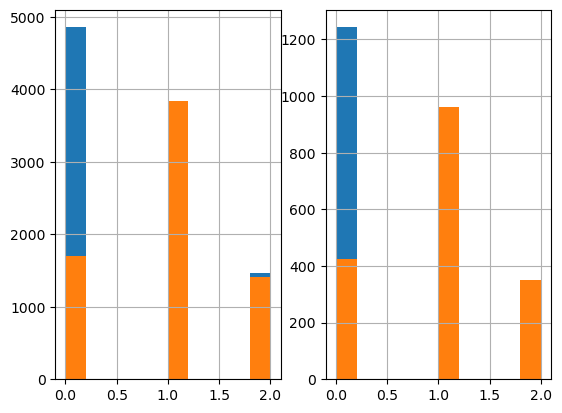

In [14]:
plt.subplot(1,2,1)
strat_train_set["Destination"].hist()
strat_train_set["HomePlanet"].hist()

plt.subplot(1,2,2)
strat_test_set["Destination"].hist()
strat_test_set["HomePlanet"].hist()

In [15]:
strat_train_set

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,MoneySpent
7249,7749_02,2,0,D/244/P,0,37.0,0,416.0,56.0,1912.0,0.0,0.0,Dynx Pie,0,2384.0
3139,3389_01,2,0,F/642/S,0,23.0,0,24.0,1.0,1264.0,0.0,0.0,Hog Bun,1,1289.0
1492,1584_01,1,0,F/314/P,0,57.0,0,433.0,0.0,0.0,371.0,0.0,Paulia Thony,0,804.0
2529,2717_01,1,0,G/431/S,0,18.0,0,130.0,0.0,13.0,191.0,554.0,Francy Mayder,0,888.0
7214,7708_01,1,0,F/1471/S,0,18.0,0,110.0,103.0,471.0,11.0,1.0,Arl Chavezalez,0,696.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,0615_01,1,1,G/92/S,0,58.0,0,0.0,0.0,0.0,0.0,0.0,Blancy Pollarkeeks,0,0.0
7803,8329_01,1,1,G/1357/P,0,22.0,0,0.0,0.0,0.0,0.0,0.0,Jeron Ington,0,0.0
5759,6105_01,0,0,E/401/S,0,58.0,0,0.0,1012.0,0.0,1120.0,20.0,Gatrix Hontichre,0,2152.0
2573,2760_01,1,0,G/438/S,0,18.0,0,0.0,0.0,0.0,0.0,0.0,Matty Rigginsen,0,0.0


In [16]:
class AgeImputer(BaseEstimator, TransformerMixin):
    def fit(self, x, y= None):
        return self
    
    def transform(self, X):
        imputer = SimpleImputer(strategy = "mean")
        X["Age"] = imputer.fit_transform(X[["Age"]])
        return X

In [17]:
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        encoder = OneHotEncoder()

        matrix = encoder.fit_transform(X[["HomePlanet"]]).toarray()
        column_names = ["Europa", "Earth", "Mars"]
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]  
            

        matrix = encoder.fit_transform(X[["CryoSleep"]]).toarray()
        column_names = ["No_sleep", "Sleep"]
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
        
        matrix = encoder.fit_transform(X[["Destination"]]).toarray()
        column_names = ["Trappist", "PSO", "Cancri"]
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
        
        return X

In [18]:
strat_train_set.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,MoneySpent
7249,7749_02,2,0,D/244/P,0,37.0,0,416.0,56.0,1912.0,0.0,0.0,Dynx Pie,0,2384.0
3139,3389_01,2,0,F/642/S,0,23.0,0,24.0,1.0,1264.0,0.0,0.0,Hog Bun,1,1289.0
1492,1584_01,1,0,F/314/P,0,57.0,0,433.0,0.0,0.0,371.0,0.0,Paulia Thony,0,804.0
2529,2717_01,1,0,G/431/S,0,18.0,0,130.0,0.0,13.0,191.0,554.0,Francy Mayder,0,888.0
7214,7708_01,1,0,F/1471/S,0,18.0,0,110.0,103.0,471.0,11.0,1.0,Arl Chavezalez,0,696.0


In [19]:
class FeatureDropper(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y = None):
        return self
    
    def transform(self, X):
        useless = ["HomePlanet", "CryoSleep", "Cabin",
                   "Destination", "RoomService", "FoodCourt",
                   "ShoppingMall", "Spa", "VRDeck", "Name"]
        return X.drop(useless, axis = 1, errors="ignore")

In [20]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([("AgeImputer", AgeImputer()),
                    ("FeatureEncoder", FeatureEncoder()),
                    ("FeatureDropper", FeatureDropper())])

In [21]:
strat_train_set = pipeline.fit_transform(strat_train_set)

In [22]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6954 entries, 7249 to 3073
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  6954 non-null   object 
 1   Age          6954 non-null   float64
 2   VIP          6954 non-null   int64  
 3   Transported  6954 non-null   int64  
 4   MoneySpent   6954 non-null   float64
 5   Europa       6954 non-null   float64
 6   Earth        6954 non-null   float64
 7   Mars         6954 non-null   float64
 8   No_sleep     6954 non-null   float64
 9   Sleep        6954 non-null   float64
 10  Trappist     6954 non-null   float64
 11  PSO          6954 non-null   float64
 12  Cancri       6954 non-null   float64
dtypes: float64(10), int64(2), object(1)
memory usage: 760.6+ KB


In [23]:
from sklearn.preprocessing import StandardScaler

X = strat_train_set.drop(["Transported"], axis = 1)
y = strat_train_set["Transported"]

scaler = StandardScaler()
X_data = scaler.fit_transform(X)
y_data = y.to_numpy()

In [24]:
"""
1)
"n_estimators": [10, 100, 200, 500, 800, 1000, 1500, 2000] - 800 best,
"max_depth":[5, 15, 30, 40] - 5 best
2)
out - 
param_grid = [
    {"n_estimators": [700,750,800,850,900], "max_depth":[2,5,7], "min_samples_split":[2,6,10]}
]
best - RandomForestClassifier(max_depth=7, min_samples_split=10, n_estimators=800)
"""

'\n1)\n"n_estimators": [10, 100, 200, 500, 800, 1000, 1500, 2000] - 800 best,\n"max_depth":[5, 15, 30, 40] - 5 best\n2)\nout - \nparam_grid = [\n    {"n_estimators": [700,750,800,850,900], "max_depth":[2,5,7], "min_samples_split":[2,6,10]}\n]\nbest - RandomForestClassifier(max_depth=7, min_samples_split=10, n_estimators=800)\n'

In [25]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6954 entries, 7249 to 3073
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  6954 non-null   object 
 1   Age          6954 non-null   float64
 2   VIP          6954 non-null   int64  
 3   MoneySpent   6954 non-null   float64
 4   Europa       6954 non-null   float64
 5   Earth        6954 non-null   float64
 6   Mars         6954 non-null   float64
 7   No_sleep     6954 non-null   float64
 8   Sleep        6954 non-null   float64
 9   Trappist     6954 non-null   float64
 10  PSO          6954 non-null   float64
 11  Cancri       6954 non-null   float64
dtypes: float64(10), int64(1), object(1)
memory usage: 706.3+ KB


In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

param_grid = [
    {"n_estimators": [800], "max_depth":[7], "min_samples_split":[10]}
]

grid_search = GridSearchCV(clf, param_grid, cv = 3, scoring = "accuracy", return_train_score=True)
grid_search.fit(X_data, y_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [7], 'min_samples_split': [10],
                          'n_estimators': [800]}],
             return_train_score=True, scoring='accuracy')

In [27]:
final_clf = grid_search.best_estimator_

In [28]:
final_clf

RandomForestClassifier(max_depth=7, min_samples_split=10, n_estimators=800)

In [29]:
strat_test_set = pipeline.fit_transform(strat_test_set)

In [30]:
strat_test_set.head()

,PassengerId,Age,VIP,Transported,MoneySpent,Europa,Earth,Mars,No_sleep,Sleep,Trappist,PSO,Cancri
8382,8961_03,4.0,0,0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1558,1653_01,47.0,0,0,2913.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7371,7882_02,10.0,0,1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4323,4606_02,24.0,0,0,9570.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7646,8158_01,40.0,0,0,1309.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


In [31]:
X_test = strat_test_set.drop(["Transported"], axis = 1)
y_test = strat_test_set["Transported"]

scaler = StandardScaler()

X_data_test = scaler.fit_transform(X_test)
y_data_test = y_test.to_numpy()

In [32]:
final_data = pipeline.fit_transform(train_data)

In [34]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  8693 non-null   object 
 1   Age          8693 non-null   float64
 2   VIP          8693 non-null   int64  
 3   Transported  8693 non-null   int64  
 4   MoneySpent   8693 non-null   float64
 5   Europa       8693 non-null   float64
 6   Earth        8693 non-null   float64
 7   Mars         8693 non-null   float64
 8   No_sleep     8693 non-null   float64
 9   Sleep        8693 non-null   float64
 10  Trappist     8693 non-null   float64
 11  PSO          8693 non-null   float64
 12  Cancri       8693 non-null   float64
dtypes: float64(10), int64(2), object(1)
memory usage: 883.0+ KB


In [36]:
X_final = final_data.drop(["Transported"], axis = 1)
y_final = final_data["Transported"]

In [37]:
scaler = StandardScaler()
X_data_final = scaler.fit_transform(X_final)
y_data_final = y_final.to_numpy()

In [38]:
X_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  8693 non-null   object 
 1   Age          8693 non-null   float64
 2   VIP          8693 non-null   int64  
 3   MoneySpent   8693 non-null   float64
 4   Europa       8693 non-null   float64
 5   Earth        8693 non-null   float64
 6   Mars         8693 non-null   float64
 7   No_sleep     8693 non-null   float64
 8   Sleep        8693 non-null   float64
 9   Trappist     8693 non-null   float64
 10  PSO          8693 non-null   float64
 11  Cancri       8693 non-null   float64
dtypes: float64(10), int64(1), object(1)
memory usage: 815.1+ KB


In [39]:
prod_clf = RandomForestClassifier()
param_grid = [
    {"n_estimators": [750, 800, 850], "max_depth":[7, 10, 13], "min_samples_split":[10,12,14]}
]

grid_search = GridSearchCV(prod_clf, param_grid, cv = 3, scoring = "accuracy", return_train_score=True)
grid_search.fit(X_data_final, y_data_final)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [7, 10, 13],
                          'min_samples_split': [10, 12, 14],
                          'n_estimators': [750, 800, 850]}],
             return_train_score=True, scoring='accuracy')

In [40]:
prod_final_clf = grid_search.best_estimator_

In [41]:
prod_final_clf

RandomForestClassifier(max_depth=7, min_samples_split=12, n_estimators=850)

In [42]:
titanic_test_data = pd.read_csv("data/test.csv")
titanic_test_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [45]:

titanic_test_data["VIP"] = titanic_test_data["VIP"].replace({True: 1, False: 0})
titanic_test_data["VIP"] = titanic_test_data["VIP"].fillna(0)
titanic_test_data['VIP'] = titanic_test_data['VIP'].astype(np.int64)

titanic_test_data["HomePlanet"] = titanic_test_data["HomePlanet"].fillna("Earth")
titanic_test_data["HomePlanet"] = titanic_test_data["HomePlanet"].replace({"Europa": 0, "Earth" : 1, "Mars" : 2})

titanic_test_data["CryoSleep"] = titanic_test_data["CryoSleep"].replace({True: 1, False: 0})
titanic_test_data["CryoSleep"] = titanic_test_data["CryoSleep"].fillna(0)
titanic_test_data['CryoSleep'] = titanic_test_data['CryoSleep'].astype(np.int64)

titanic_test_data["Destination"] = titanic_test_data["Destination"].fillna("TRAPPIST-1e")
titanic_test_data["Destination"] = titanic_test_data["Destination"].replace({"TRAPPIST-1e": 0, "PSO J318.5-22" : 1, "55 Cancri e" : 2})

"""
earth = 4602
Europa = 2131
Mars = 1759
"""
titanic_test_data["RoomService"] = titanic_test_data["RoomService"].fillna(0)
titanic_test_data["FoodCourt"] = titanic_test_data["FoodCourt"].fillna(0)
titanic_test_data["ShoppingMall"] = titanic_test_data["ShoppingMall"].fillna(0)
titanic_test_data["Spa"] = titanic_test_data["Spa"].fillna(0)
titanic_test_data["VRDeck"] = titanic_test_data["VRDeck"].fillna(0)

In [47]:
titanic_test_data["MoneySpent"] = titanic_test_data["RoomService"] + titanic_test_data["FoodCourt"] + titanic_test_data["ShoppingMall"] + titanic_test_data["Spa"] + titanic_test_data["VRDeck"]
titanic_test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Europa,Earth,Mars,MoneySpent
0,0013_01,1,1,G/3/S,0,27.0,0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,1.0,0.0,0.0,0.0
1,0018_01,1,0,F/4/S,0,19.0,0,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,1.0,0.0,0.0,2832.0
2,0019_01,0,1,C/0/S,2,31.0,0,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,0.0,1.0,0.0,0.0
3,0021_01,0,0,C/1/S,0,38.0,0,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,0.0,1.0,0.0,7418.0
4,0023_01,1,0,F/5/S,0,20.0,0,10.0,0.0,635.0,0.0,0.0,Brence Harperez,1.0,0.0,0.0,645.0


In [48]:
final_test_data = pipeline.fit_transform(titanic_test_data)

In [49]:
final_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  4277 non-null   object 
 1   Age          4277 non-null   float64
 2   VIP          4277 non-null   int64  
 3   Europa       4277 non-null   float64
 4   Earth        4277 non-null   float64
 5   Mars         4277 non-null   float64
 6   MoneySpent   4277 non-null   float64
 7   No_sleep     4277 non-null   float64
 8   Sleep        4277 non-null   float64
 9   Trappist     4277 non-null   float64
 10  PSO          4277 non-null   float64
 11  Cancri       4277 non-null   float64
dtypes: float64(10), int64(1), object(1)
memory usage: 401.1+ KB


In [50]:
X_final_test = final_test_data
X_final_test = X_final_test.fillna(method="ffill")
scaler = StandardScaler()
X_data_final_test = scaler.fit_transform(X_final_test)

In [51]:
predictions = prod_final_clf.predict(X_data_final_test)

In [55]:
predictions[0:50]

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int64)

In [56]:
final_df = pd.DataFrame(titanic_test_data["PassengerId"])
final_df["Survived"] = predictions
final_df.to_csv("data/predictions.csv", index = False)